In [ ]:
pip install text-hammer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import text_hammer as th
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import wordcloud
import tensorflow as tf
import re
import numpy as np
import imblearn
from sklearn import preprocessing
from wordcloud import WordCloud
from nltk.corpus import stopwords
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mbti_1.csv')
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [ ]:
print(df.index)

RangeIndex(start=0, stop=8675, step=1)


In [ ]:
df= df.dropna()
df.reset_index(inplace=True)
print(df.index)

RangeIndex(start=0, stop=8675, step=1)


In [ ]:
df=df.drop(['index'], axis=1)


In [ ]:
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               8675 non-null   object 
 1   posts              8675 non-null   object 
 2   words_per_comment  8675 non-null   float64
dtypes: float64(1), object(2)
memory usage: 203.4+ KB


In [ ]:
def text_preprocess(df, col_name):
  column= col_name
  df[column]= df[column].progress_apply(lambda x:str(x).lower())
  df[column]= df[column].progress_apply(lambda x: th.cont_exp(x))
  df[column]= df[column].progress_apply(lambda x: th.remove_emails(x))
  df[column]= df[column].progress_apply(lambda x: th.remove_html_tags(x))
  df[column]= df[column].progress_apply(lambda x: th.remove_urls(x))
  df[column]= df[column].progress_apply(lambda x: th.remove_stopwords(x))
  '''df[column]= df[column].progress_apply(lambda x: th.spelling_correction(x))'''
  df[column]= df[column].progress_apply(lambda x: th.remove_special_chars(x))
  df[column]= df[column].progress_apply(lambda x: th.remove_accented_chars(x))
  df[column]= df[column].progress_apply(lambda x: th.make_base(x))
  return df

df= text_preprocess(df, "posts")
x=df['posts']


  0%|          | 0/8675 [00:00<?, ?it/s]

  0%|          | 0/8675 [00:00<?, ?it/s]

  0%|          | 0/8675 [00:00<?, ?it/s]

  0%|          | 0/8675 [00:00<?, ?it/s]

  0%|          | 0/8675 [00:00<?, ?it/s]

  0%|          | 0/8675 [00:00<?, ?it/s]

  0%|          | 0/8675 [00:00<?, ?it/s]

  0%|          | 0/8675 [00:00<?, ?it/s]

  0%|          | 0/8675 [00:00<?, ?it/s]

In [ ]:
df.head()

,type,posts
0,INFJ,enfp intj moment sportscenter play prankswhat ...
1,ENTP,I find lack post alarmingsex boring position o...
2,INTP,good _ _ _ _ _ of course know blessing cursedo...
3,INTJ,dear intp enjoy conversation day esoteric gabb...
4,ENTJ,you re firedthat silly misconception approach ...


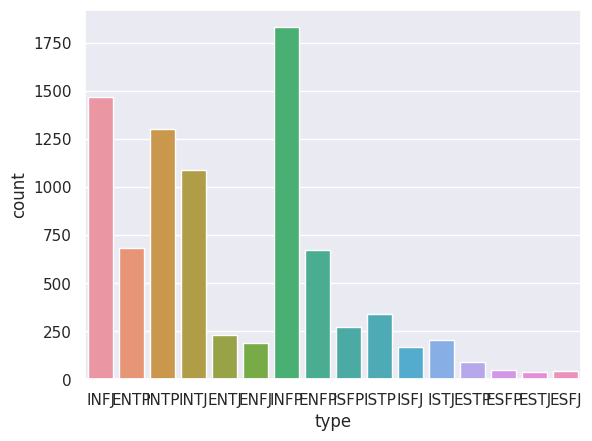

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# dft= sns.load_dataset(df)
sns.countplot(x=df['type'])
# sns.countplot(df['type'].values)
plt.show()

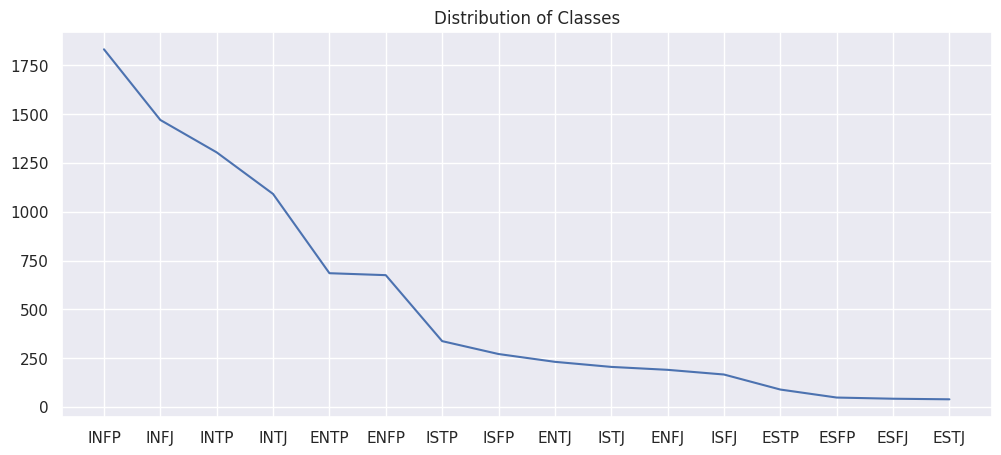

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df['type'].value_counts())
plt.title('Distribution of Classes')
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'like'),
  Text(1, 0, 'think'),
  Text(2, 0, 'people'),
  Text(3, 0, 'know'),
  Text(4, 0, 'I'),
  Text(5, 0, 'you'),
  Text(6, 0, 'thing'),
  Text(7, 0, 'feel'),
  Text(8, 0, 'time'),
  Text(9, 0, 'good'),
  Text(10, 0, 'want'),
  Text(11, 0, 'type'),
  Text(12, 0, 'it'),
  Text(13, 0, 'love'),
  Text(14, 0, 'way'),
  Text(15, 0, 'friend'),
  Text(16, 0, 'go'),
  Text(17, 0, 'find'),
  Text(18, 0, 'say'),
  Text(19, 0, 'try'),
  Text(20, 0, 'lot'),
  Text(21, 0, 'not'),
  Text(22, 0, 'well'),
  Text(23, 0, 'get'),
  Text(24, 0, 'work'),
  Text(25, 0, 'look'),
  Text(26, 0, 'come'),
  Text(27, 0, 'life'),
  Text(28, 0, 'need'),
  Text(29, 0, 're')])

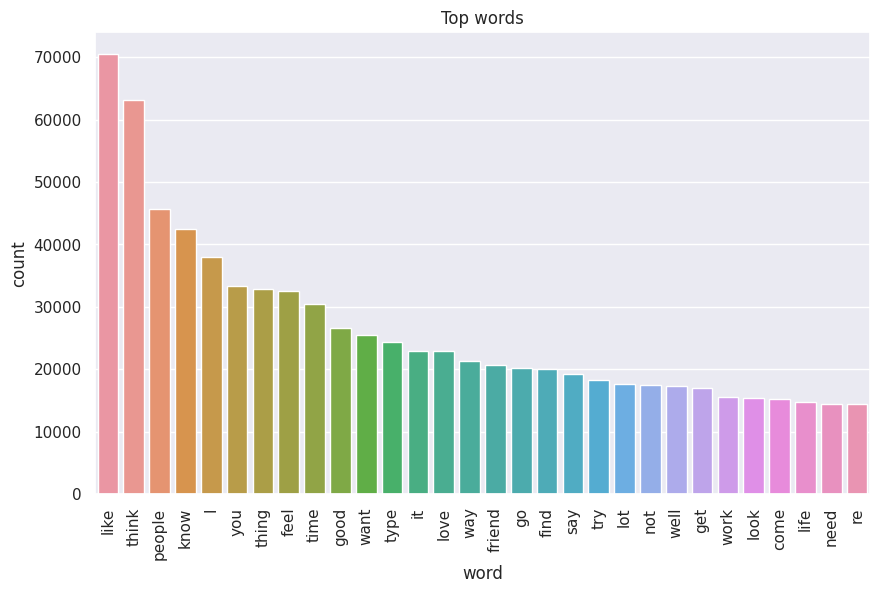

In [ ]:
nltk.download('punkt')
words_list= []
for post in df['posts']:
  words_list.extend(nltk.word_tokenize(post))
freq_dist= nltk.FreqDist(words_list)
freq_dist.most_common(20)
temp= pd.DataFrame(freq_dist.most_common(30), columns=['word', 'count'])
fig, ax= plt.subplots(figsize=(10,6))
sns.barplot(x='word', y='count', data=temp, ax=ax)
plt.title("Top words")
plt.xticks(rotation='vertical')


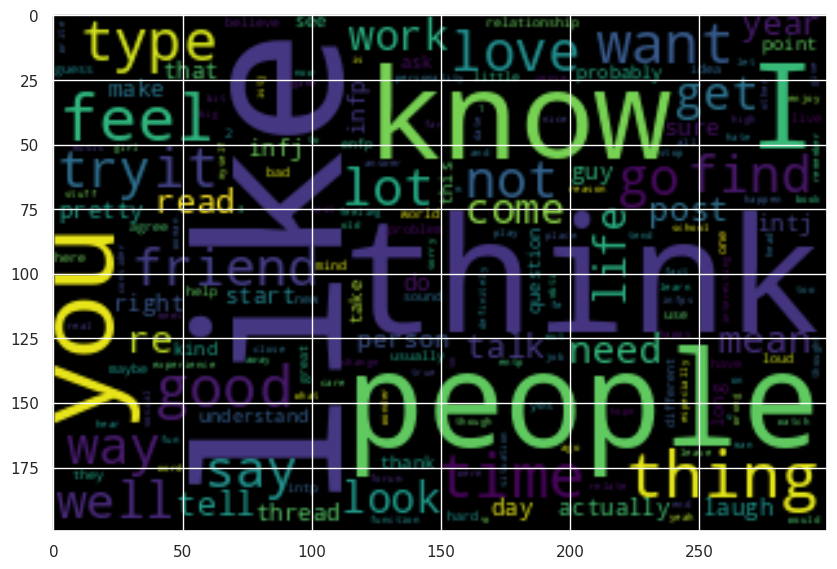

In [ ]:
wcloud= WordCloud(stopwords=set(wordcloud.STOPWORDS), colormap='viridis', width=300, height=200).generate_from_frequencies(freq_dist)
plt.figure(figsize=(10,7), frameon=True)
plt.imshow(wcloud, interpolation= 'bilinear')
plt.show()

In [ ]:
df['words_per_comment']= df['posts'].apply(lambda x: len(x.split())/50)
df.head()

,type,posts,words_per_comment
0,INFJ,enfp intj moment sportscenter play prankswhat ...,5.64
1,ENTP,I find lack post alarmingsex boring position o...,10.62
2,INTP,good _ _ _ _ _ of course know blessing cursedo...,8.24
3,INTJ,dear intp enjoy conversation day esoteric gabb...,9.94
4,ENTJ,you re firedthat silly misconception approach ...,9.00


/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 67.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 43.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 63.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 56.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.2% of the points cannot be placed; yo

<Axes: xlabel='type', ylabel='words_per_comment'>

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 66.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 42.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 61.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 56.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 71.0% of the points cannot be placed; y

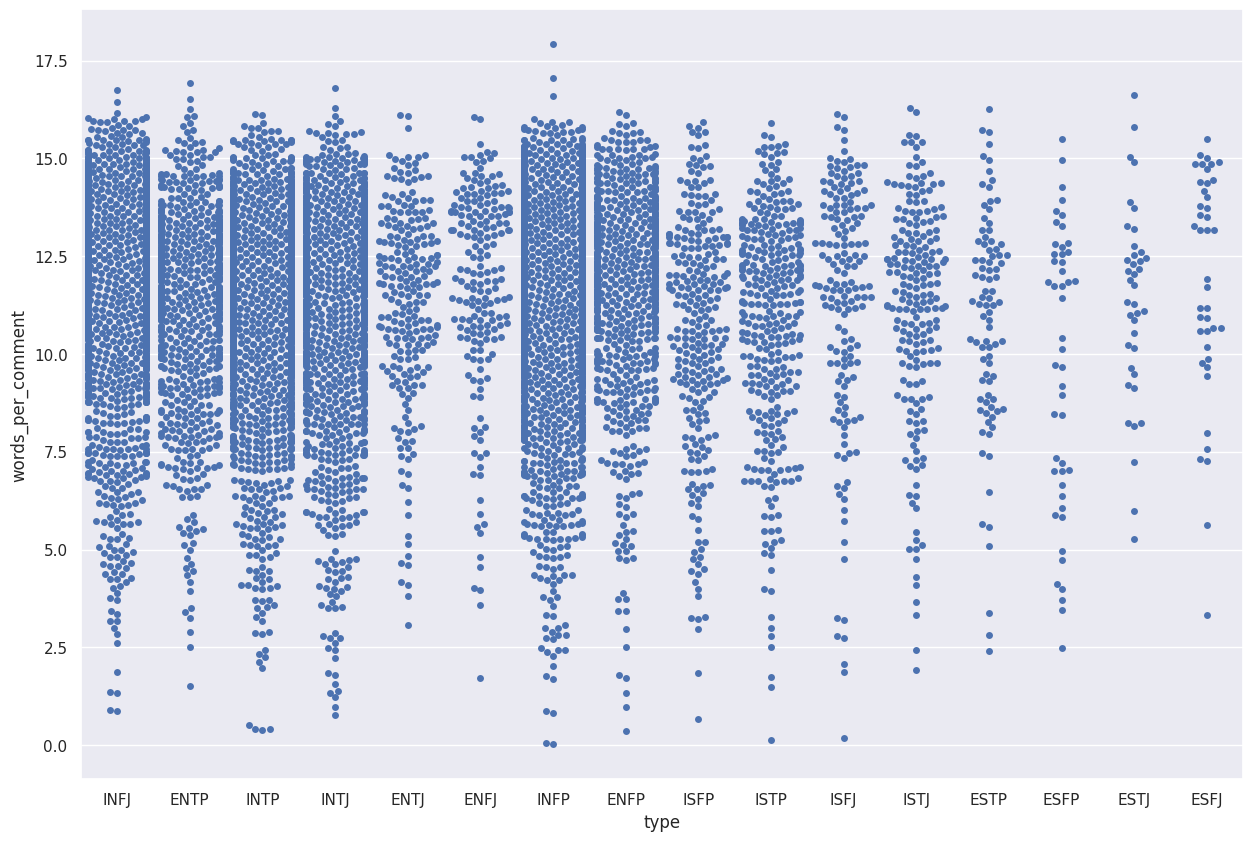

In [ ]:
plt.figure(figsize=(15,10))
# sns.swarmplot("type", "words_per_comment",df)
sns.set(color_codes=True)
sns.swarmplot(data=df, x="type", y="words_per_comment")

In [ ]:
y= df.iloc[:,0].values
print("before: \n",y)
le= preprocessing.LabelEncoder()
y= le.fit_transform(y)

y=tf.keras.utils.to_categorical(y)
print("After: \n",y)

before: 
 ['INFJ' 'ENTP' 'INTP' ... 'INTP' 'INFP' 'INFP']
After: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
voc_size=50000
messages=df['posts'].copy()
messages

0       enfp intj moment sportscenter play prankswhat ...
1       I find lack post alarmingsex boring position o...
2       good _ _ _ _ _ of course know blessing cursedo...
3       dear intp enjoy conversation day esoteric gabb...
4       you re firedthat silly misconception approach ...
                              ...                        
8670    ixfp think cat fi dom reason especially websit...
8671    soif thread exist someplace which do heck dele...
8672    so question thing purple pill pick win lottery...
8673    I conflict right come want child honestly mate...
8674    it long personalitycafe change bit good like t...
Name: posts, Length: 8675, dtype: object

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range (0,len(messages)):
    review = re.sub('[^a-zA-Z]','',messages[i])
    review=review.lower()
    review=review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english') ]
    review=''.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from tensorflow.keras.preprocessing.text import one_hot
oe=[one_hot(words,voc_size) for words in corpus ]

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sent_length=250
embedded_docs = pad_sequences(oe,padding='pre',maxlen = sent_length)
embedded_docs

array([[    0,     0,     0, ...,     0,     0, 18882],
       [    0,     0,     0, ...,     0,     0, 17888],
       [    0,     0,     0, ...,     0,     0, 21817],
       ...,
       [    0,     0,     0, ...,     0,     0, 40915],
       [    0,     0,     0, ...,     0,     0, 26906],
       [    0,     0,     0, ...,     0,     0, 30522]], dtype=int32)

In [ ]:
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout
from tensorflow.keras import Sequential
dimension=100
model = Sequential()
model.add(Embedding(voc_size,dimension,input_length = sent_length))
model.add(Dropout(0.25))
model.add(LSTM(100))
model.add(Dropout(0.25))
model.add(Dense(16,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer ='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          5000000   
                                                                 
 dropout (Dropout)           (None, 250, 100)          0         
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 16)                1616      
                                                                 
Total params: 5,082,016
Trainable params: 5,082,016
Non-trainable params: 0
_________________________________________________________________


In [ ]:
df.type.value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [ ]:
X=np.array(embedded_docs)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_rus, y_rus = ros.fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_rus, y_rus, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [EarlyStopping( monitor="val_accuracy", patience=2 ),
            ModelCheckpoint('./model0.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)]

In [ ]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=64, callbacks = callbacks )

Epoch 1/20
367/367 [==============================] - ETA: 0s - loss: 2.1779 - accuracy: 0.3395
Epoch 1: val_accuracy improved from -inf to 0.69691, saving model to ./model0.h5
367/367 [==============================] - 208s 561ms/step - loss: 2.1779 - accuracy: 0.3395 - val_loss: 1.0400 - val_accuracy: 0.6969
Epoch 2/20
367/367 [==============================] - ETA: 0s - loss: 0.6347 - accuracy: 0.8355
Epoch 2: val_accuracy improved from 0.69691 to 0.85093, saving model to ./model0.h5
367/367 [==============================] - 213s 579ms/step - loss: 0.6347 - accuracy: 0.8355 - val_loss: 0.5097 - val_accuracy: 0.8509
Epoch 3/20
367/367 [==============================] - ETA: 0s - loss: 0.2408 - accuracy: 0.9539
Epoch 3: val_accuracy improved from 0.85093 to 0.85571, saving model to ./model0.h5
367/367 [==============================] - 212s 577ms/step - loss: 0.2408 - accuracy: 0.9539 - val_loss: 0.4748 - val_accuracy: 0.8557
Epoch 4/20
367/367 [==============================] - ETA:

In [ ]:
model= tf.keras.models.load_model('model0.h5')
preds= model.predict(x_test)
eval= model.evaluate(x_test,y_test)
print("Loss: ", eval[0])
print("Accuracy: ", eval[1])

  1/184 [..............................] - ETA: 34s - loss: 0.3023 - accuracy: 0.9062

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


184/184 [==============================] - 9s 45ms/step - loss: 0.5028 - accuracy: 0.8584
Loss:  0.5028413534164429
Accuracy:  0.85843425989151


In [ ]:
from sklearn.metrics import confusion_matrix
t_cat=[]
for y in y_test:
  t_cat.append(np.where(y==1)[0])
p_cat= tf.argmax(preds, axis=1)
p_cat
print(confusion_matrix(p_cat, t_cat))

[[375   0   0   2   0   0   0   0   7   2   4   0   0   1   0   1]
 [  0 303   0   0   0   0   0   0   6   6   5   3   0   0   0   1]
 [  0   0 397   0   0   0   0   0   1   2   0   0   0   7   4   1]
 [  0   1   0 290   0   0   0   0   4   5   7  11   0   0   0   0]
 [  0   0   0   0 382   0   0   0   0   1   0   0   0   5   0   0]
 [  0   0   0   0   0 371   0   0   0   1   0   0   0   0   0   0]
 [  0   0   0   1   0   0 351   0   1   0   0   0   0   0   0   2]
 [  0   1   0   0   0   0   0 391   1   1   0   2   0   4   0   1]
 [  0   8   0   5   0   0   0   0 143  53  37  30   0   0   0   0]
 [  0  30   0  28   0   0   0   0 154 242  91 126   0   2   0   4]
 [  1   3   0   4   0   0   0   0  15  14 216   8   0   1   0   0]
 [  0   5   1  10   0   0   0   0  16  13  14 153   0   1   0   0]
 [  0   1   0   1   0   0   0   0   3   0   0   1 339   0   0   1]
 [  0   3   0   0   0   0   0   0   5   4   1   2   5 361   0   0]
 [  0   2   3   1   0   0   0   0   2   0   0   2   0   0 349 

In [ ]:
features=50000
embedding_dim=64
seq_len= 250
model2= tf.keras.Sequential()
model2.add(tf.keras.layers.Embedding(features +1, embedding_dim, input_length=seq_len),)
model2.add(tf.keras.layers.Conv1D(128,16, activation='relu'))
model2.add(tf.keras.layers.GlobalMaxPooling1D())
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.Dense(16, activation='sigmoid'))
model2.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='Nadam', metrics=["accuracy"])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 250, 64)           3200064   
                                                                 
 conv1d (Conv1D)             (None, 235, 128)          131200    
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 16)                2064      
                                                                 
Total params: 3,333,328
Trainable params: 3,333,328
Non-trainable params: 0
____________________________________________

In [ ]:
callbacks2 = [EarlyStopping( monitor="val_accuracy", patience=2 ),
            ModelCheckpoint('./model1.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)]

In [ ]:
history2= model2.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=64, callbacks = callbacks2 )

Epoch 1/20
367/367 [==============================] - ETA: 0s - loss: 0.2347 - accuracy: 0.9405
Epoch 1: val_accuracy improved from -inf to 0.85912, saving model to ./model1.h5
367/367 [==============================] - 136s 372ms/step - loss: 0.2347 - accuracy: 0.9405 - val_loss: 0.5798 - val_accuracy: 0.8591
Epoch 2/20
367/367 [==============================] - ETA: 0s - loss: 0.2168 - accuracy: 0.9434
Epoch 2: val_accuracy improved from 0.85912 to 0.85929, saving model to ./model1.h5
367/367 [==============================] - 138s 376ms/step - loss: 0.2168 - accuracy: 0.9434 - val_loss: 0.5867 - val_accuracy: 0.8593
Epoch 3/20
367/367 [==============================] - ETA: 0s - loss: 0.1994 - accuracy: 0.9446
Epoch 3: val_accuracy improved from 0.85929 to 0.86048, saving model to ./model1.h5
367/367 [==============================] - 147s 401ms/step - loss: 0.1994 - accuracy: 0.9446 - val_loss: 0.6288 - val_accuracy: 0.8605
Epoch 4/20
367/367 [==============================] - ETA:

In [ ]:
model = tf.keras.models.load_model('model1.h5')
preds = model.predict(x_test)
eval = model.evaluate(x_test,y_test)
print("Loss: ",eval[0])
print("Accuracy: ",eval[1])

  3/184 [..............................] - ETA: 5s - loss: 0.3206 - accuracy: 0.9271 

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


184/184 [==============================] - 8s 45ms/step - loss: 0.6091 - accuracy: 0.8627
Loss:  0.6091439127922058
Accuracy:  0.8626982569694519


In [ ]:
from sklearn.metrics import confusion_matrix
true_cat = []
for y in y_test:
  true_cat.append(np.where(y==1)[0])
predicted_cat = tf.argmax(preds, axis=1)
predicted_cat
print(confusion_matrix(predicted_cat, true_cat))

[[376   0   0   2   0   0   0   0   7   2   4   0   0   1   0   1]
 [  0 309   0   1   0   0   0   0   6   6   5   3   0   0   0   1]
 [  0   0 394   0   0   0   0   0   1   2   0   0   0   7   0   1]
 [  0   1   0 299   0   0   0   0   4   5   7   9   0   2   0   0]
 [  0   0   0   0 382   0   0   0   0   1   0   0   0   5   0   0]
 [  0   0   0   0   0 371   0   0   0   1   0   0   0   0   0   0]
 [  0   0   0   1   0   0 351   0   1   0   0   0   0   0   0   2]
 [  0   1   0   0   0   0   0 391   1   1   0   2   0   4   0   1]
 [  0   1   0   0   0   0   0   0 103   9   6   6   0   0   0   0]
 [  0  38   0  37   0   0   0   0 211 304 133 160   0   2   0   4]
 [  0   1   2   0   0   0   0   0   8   7 215   3   0   2   0   0]
 [  0   0   0   0   0   0   0   0   6   2   4 150   0   0   0   0]
 [  0   1   0   1   0   0   0   0   3   0   0   1 350   1   0   3]
 [  0   3   0   0   0   0   0   0   5   4   1   2   0 358   0   0]
 [  0   2   5   1   0   0   0   0   2   0   0   2   0   0 353 

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
clf = MLPClassifier(random_state=69, max_iter=300).fit(x_train, y_train)
clf.score(x_test, y_test)

0.03462391267269316

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
dtc= DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)
print("Accuracy of Decision Tree:",metrics.accuracy_score(y_test, y_pred))

Accuracy of Decision Tree: 0.8268804366365342


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred= rfc.predict(x_test)
print("Accuracy of RandomForest Classifier:",metrics.accuracy_score(y_test, y_pred))

Accuracy of RandomForest Classifier: 0.8292682926829268


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy of KNN:",metrics.accuracy_score(y_test, y_pred))

Accuracy of KNN: 0.6732048439365512


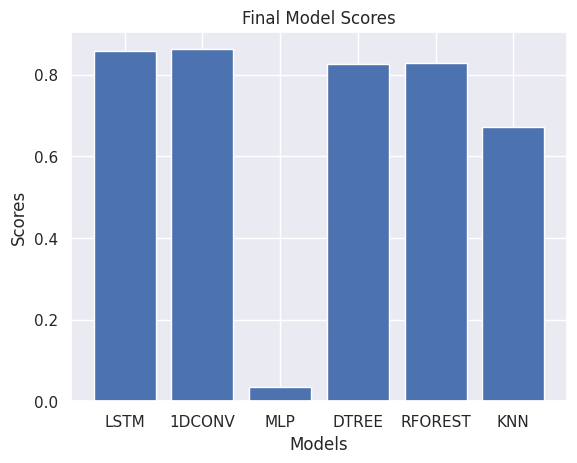

In [ ]:
x_axis= ['LSTM', '1DCONV', 'MLP', 'DTREE', 'RFOREST', 'KNN']
y_axis= [0.8584, 0.8626, 0.0346, 0.8268, 0.8292, 0.6732]
plt.bar(x_axis, y_axis)
plt.title('Final Model Scores')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.show()

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mbti_1.csv')
df['Length'] = df['posts'].apply(lambda x: len(x.split(' ')))
df['Length'].describe()

count    8675.000000
mean     1262.678963
std       317.261077
min         4.000000
25%      1081.000000
50%      1314.000000
75%      1497.000000
max      2212.000000
Name: Length, dtype: float64

In [ ]:
df_Pred = df.sample(frac=0.1)
len(df_Pred)

868

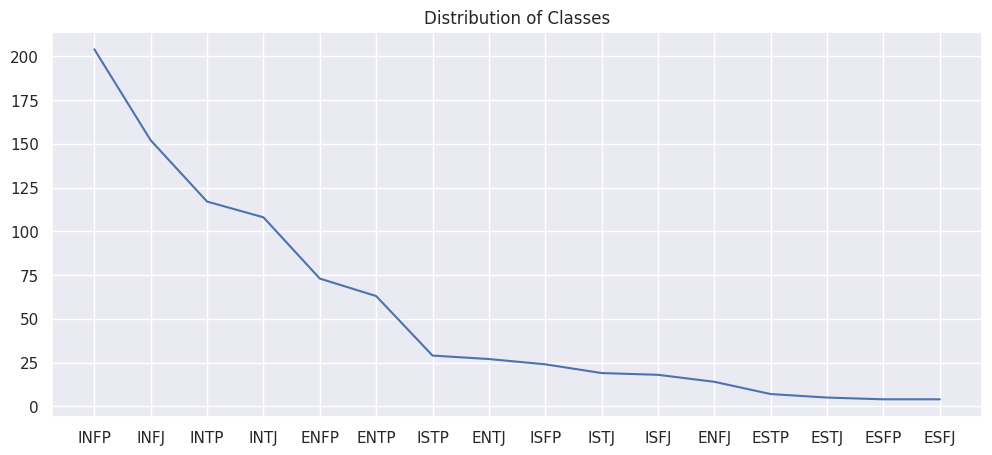

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df_Pred['type'].value_counts())
plt.title('Distribution of Classes')
plt.show()

In [ ]:
Words = list()
for i in list(df_Pred['posts']):
    for j in i.split(' '):
        Words.append(j)

In [ ]:
from collections import Counter
Words_dic = Counter(Words)
Words_dic = pd.DataFrame({'Word':list(Words_dic.keys()),'Frequency':list(Words_dic.values())})
Words_dic.sort_values('Frequency',ascending=False,inplace=True)
Words_dic.set_index('Word',inplace=True)
print(len(Words_dic))
Words_dic.head()

107256


,Frequency
Word,
I,38254
,31739
to,29363
the,27324
a,22846


In [ ]:
Words_dic['Frequency'].describe()

count    107256.000000
mean         10.205201
std         263.951564
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max       38254.000000
Name: Frequency, dtype: float64

In [ ]:
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    print(Words_dic['Frequency'].quantile(i))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
5.0


In [ ]:
for i in [0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]:
    print(Words_dic['Frequency'].quantile(i))

6.0
7.0
8.0
10.0
12.0
16.0
23.0
38.0
88.0


In [ ]:
Words_dic = Words_dic[Words_dic.Frequency>1341.6500000000087]
len(Words_dic)

101

In [ ]:
Final_Words = list(Words_dic.index)
for i in Final_Words:
    df[i] = df['posts'].apply(lambda x: 1 if i in x.split(' ') else 0)
df.drop(['Length','posts'],axis=1,inplace=True)
df.head()

<ipython-input-185-200973d4c453>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i] = df['posts'].apply(lambda x: 1 if i in x.split(' ') else 0)
<ipython-input-185-200973d4c453>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i] = df['posts'].apply(lambda x: 1 if i in x.split(' ') else 0)
<ipython-input-185-200973d4c453>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(

,type,I,,to,the,a,and,of,is,that,...,make,But,lot,never,their,too,could,way,even,someone
0,INFJ,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,1,1,0,1,1
1,ENTP,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,0,0,1,1,1
2,INTP,1,1,1,1,1,1,1,1,1,...,1,1,0,1,0,0,1,1,1,1
3,INTJ,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,0,1,0
4,ENTJ,1,1,1,1,1,1,1,1,1,...,0,1,0,1,1,1,0,1,1,0


In [ ]:
MBTI_EDA = df.groupby('type').mean()
MBTI_EDA = MBTI_EDA.transpose()
MBTI_EDA.head()

type,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
I,0.984211,0.994074,0.991342,0.994161,1.0,1.0,1.0,0.966292,0.993197,0.991266,0.991751,0.992331,0.987952,0.98893,0.990244,0.982196
,0.989474,1.000000,1.000000,0.994161,1.0,1.0,1.0,1.000000,0.998639,0.997271,0.995417,0.997699,0.987952,0.99631,0.995122,0.997033
to,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.000000,0.999454,1.000000,0.999233,1.000000,1.00000,1.000000,0.994065
the,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.000000,0.999454,0.999083,0.999233,0.993976,1.00000,1.000000,0.997033
a,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.000000,0.999454,0.997250,0.998466,0.987952,0.99631,1.000000,1.000000


In [ ]:
len(MBTI_EDA)

101

In [ ]:
#Model Making-

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score

Personalities = ['INFP','INFJ','INTP','INTJ','ENTP','ENFP','ISTP','ISFP','ENTJ','ISTJ','ENFJ','ISFJ','ESTP','ESFP','ESFJ','ESTJ']
Feature_Importance = pd.DataFrame()

In [ ]:
MBTI =  df.sample(frac=0.05)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(MBTI['type'])

In [ ]:
for i in Personalities:
    Temp = MBTI.copy()
    Temp['type'] = Temp['type'].apply(lambda x: 1 if x==i else 0)
    X = Temp.drop('type',axis=1)
    #y = Temp['Personality Type']
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=100)

    Model = RandomForestClassifier(n_jobs=-1,random_state=100,class_weight='balanced')

    params = {'n_estimators':[100],
              'max_depth':[3,5,7,10,12,15],
              'max_features':[0.05,0.1,0.15,0.2],
              'criterion':["gini","entropy"]}

    grid_search = GridSearchCV(estimator=Model,param_grid=params,verbose=1,n_jobs=-1,scoring='accuracy')
    grid_search.fit(X_train,y_train)

    Model_best = grid_search.best_estimator_

    y_train_pred = Model_best.predict(X_train)
    y_test_pred = Model_best.predict(X_test)

    print(i)
    print('Train Accuracy :',accuracy_score(y_train,y_train_pred))
    print('Test Accuracy :',accuracy_score(y_test,y_test_pred))


    Feature_Importance['Feature'] = X_train.columns
    Feature_Importance[i] = Model_best.feature_importances_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


INFP
Train Accuracy : 1.0
Test Accuracy : 0.19083969465648856
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


INFJ
Train Accuracy : 1.0
Test Accuracy : 0.19083969465648856
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


INTP
Train Accuracy : 1.0
Test Accuracy : 0.19083969465648856
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


INTJ
Train Accuracy : 1.0
Test Accuracy : 0.19083969465648856
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


ENTP
Train Accuracy : 1.0
Test Accuracy : 0.19083969465648856
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


ENFP
Train Accuracy : 1.0
Test Accuracy : 0.19083969465648856
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


ISTP
Train Accuracy : 1.0
Test Accuracy : 0.19083969465648856
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


ISFP
Train Accuracy : 1.0
Test Accuracy : 0.19083969465648856
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


ENTJ
Train Accuracy : 1.0
Test Accuracy : 0.19083969465648856
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


ISTJ
Train Accuracy : 1.0
Test Accuracy : 0.19083969465648856
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


ENFJ
Train Accuracy : 1.0
Test Accuracy : 0.19083969465648856
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


ISFJ
Train Accuracy : 1.0
Test Accuracy : 0.19083969465648856
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


ESTP
Train Accuracy : 1.0
Test Accuracy : 0.19083969465648856
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


ESFP
Train Accuracy : 1.0
Test Accuracy : 0.19083969465648856
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


ESFJ
Train Accuracy : 1.0
Test Accuracy : 0.19083969465648856
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


ESTJ
Train Accuracy : 1.0
Test Accuracy : 0.19083969465648856


In [ ]:
Feature_Importance.head()

,Feature,INFP,INFJ,INTP,INTJ,ENTP,ENFP,ISTP,ISFP,ENTJ,ISTJ,ENFJ,ISFJ,ESTP,ESFP,ESFJ,ESTJ
0,I,0.000220,0.000220,0.000220,0.000220,0.000220,0.000220,0.000220,0.000220,0.000220,0.000220,0.000220,0.000220,0.000220,0.000220,0.000220,0.000220
1,,0.000213,0.000213,0.000213,0.000213,0.000213,0.000213,0.000213,0.000213,0.000213,0.000213,0.000213,0.000213,0.000213,0.000213,0.000213,0.000213
2,to,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,the,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,a,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
import pickle
with open('model3.pkl','wb') as f:
    pickle.dump(Model, f)

In [ ]:
new_text = "i am an introverted person. i good to stay productive"
new_features = []
for word in Final_Words:
    if word in new_text.lower():
        new_features.append(1)
    else:
        new_features.append(0)

In [ ]:
prediction=grid_search.predict([new_features])
print(le.classes_[prediction[0]])
print([prediction[0]])

ISFP
[13]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pickle
with open('model0.pkl','wb') as f:
    pickle.dump(Model, f)

In [ ]:
prediction=grid_search.predict([new_features])
print(le.classes_[prediction[0]])
print([prediction[0]])

ISFP
[13]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gdf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x_train, y_train2)
clf.score(x_test, y_test)

ValueError: ignored

In [ ]:
from sklearn.ensemble import VotingClassifier
estimators=[('dt', DecisionTreeClassifier()), ('rf', RandomForestClassifier()), ('knn', KNeighborsClassifier())]
ensemble = VotingClassifier(estimators, voting='soft')
ensemble.fit(x_train, y_train)
ensemble.score(x_test, y_test)

NotImplementedError: ignored

In [ ]:
from vecstack import stacking
model_1 = RandomForestClassifier()
model_2 = KNeighborsClassifier()
model_3 = DecisionTreeClassifier()
all_models = [model_1, model_2, model_3]
s_train, s_test = stacking(all_models, x_train, x_test, y_train, regression=True, n_folds=4)
final_model = model_1
final_model = final_model.fit(s_train, y_train)
pred_final = final_model.predict(x_test)
print(mean_squared_error(y_test, pred_final))

ValueError: ignored

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
clf = [('lstm',model),('1dc',model2)] #list of (str, estimator)
lr = LogisticRegression()
stack_model = StackingClassifier( estimators = clf,final_estimator = lr)
score = cross_val_score(stack_model,x_train,y_train,cv = 5,scoring = 'accuracy')
print("The accuracy score of is:",score.mean())

ValueError: ignored

In [ ]:
nltk.download('stopwords')
messages= df['posts']
ps= nltk.PorterStemmer()
corpus=[]
for i in range (0,len(messages)):
  review= re.sub('[^a-zA-Z]','',messages[i])
  review= review.lower()
  review= review.split()
  review= [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review= ''.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
corpus= le.fit_transform(corpus)
print(corpus)

[1238 2805 1667 ... 6518 2503 4428]


In [ ]:
oe=[tf.one_hot(words,voc_size) for words in corpus]

InvalidArgumentError: ignored

In [ ]:
history= model.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=20,batch_size=64, callbacks=callbacks)

Epoch 1/20
367/367 [==============================] - ETA: 0s - loss: 2.7740 - accuracy: 0.0614
Epoch 1: val_accuracy improved from -inf to 0.06021, saving model to ./model.h5
367/367 [==============================] - 227s 607ms/step - loss: 2.7740 - accuracy: 0.0614 - val_loss: 2.7749 - val_accuracy: 0.0602
Epoch 2/20
367/367 [==============================] - ETA: 0s - loss: 2.7733 - accuracy: 0.0609
Epoch 2: val_accuracy improved from 0.06021 to 0.06038, saving model to ./model.h5
367/367 [==============================] - 222s 605ms/step - loss: 2.7733 - accuracy: 0.0609 - val_loss: 2.7738 - val_accuracy: 0.0604
Epoch 3/20
367/367 [==============================] - ETA: 0s - loss: 2.7732 - accuracy: 0.0627
Epoch 3: val_accuracy improved from 0.06038 to 0.06362, saving model to ./model.h5
367/367 [==============================] - 225s 611ms/step - loss: 2.7732 - accuracy: 0.0627 - val_loss: 2.7743 - val_accuracy: 0.0636
Epoch 4/20
367/367 [==============================] - ETA: 0s

KeyboardInterrupt: ignored